In [2]:
statusBadCount = 0;import random as rand
import numpy as np
import matplotlib.pyplot as plt

In [216]:
auvRange = 20
shrimpRange = 1000
#rate = shrimpRange/auvRange
timeNoiseRange = 0.0005
distNoiseRange = (1/100)*auvRange

auvPos = [[0,0],[0,0],[0,0],[0,0]]
auvPosWN = [[0,0],[0,0],[0,0],[0,0]]

def createPositions(auvPos):
    for i in range(len(auvPos)):
        auvPos[i] = [rand.random()*auvRange, rand.random()*auvRange]
        rand1 = rand.random()*distNoiseRange 
        rand2 = rand.random()*distNoiseRange
        auvPosWN[i] = [(auvPos[i][0]+rand1),(auvPos[i][1]+rand2)]
    return auvPos,auvPosWN
auvPos,auvPosWN = createPositions(auvPos)

shrimpPos = [rand.random()*shrimpRange, rand.random()*shrimpRange]
#print(auvPos)
#print(auvPosWN)

In [4]:
diff = [[0,0],[0,0],[0,0],[0,0]]
def getDiffFromShrimp(shrimpPos, auvPos):
    for i in range(len(auvPos)):
        diff[i] = [shrimpPos[0] - auvPos[i][0],shrimpPos[1] - auvPos[i][1]];
        
    return diff

diff = getDiffFromShrimp(shrimpPos, auvPos)
#diff = getDiffFromShrimp(shrimpPos, auvPosWN) 
#auvPos = auvPosWN

In [5]:
functions = []
soundSpeed = 1498
#gets deltas in seconds
def getMags():
    mag = [[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]]
    k = 0
    for i in range(4):
        for j in range(i+1, 4):
           # print(i,j)
            mag[k] = (np.linalg.norm(diff[i])-np.linalg.norm(diff[j]))
            #mag[k] = mag[k] + rand.random()*noiseRange;
            k = k+1
    return mag
#i want a for loop that prints 0,1 0,2 0,3 1,2,1,3 2,3 

timediff = getMags()

In [6]:
def loss(s):
    error = np.zeros(6)
    k = 0
    diff = getDiffFromShrimp(s, auvPos)
    for i in range(4):
        for j in range(i+1,4):
            #print(i,j)
            error[k] = timediff[k]-(np.linalg.norm(diff[i])-np.linalg.norm(diff[j]))
            k = k+1
    return error

In [20]:
from scipy.optimize import least_squares
#shrimp location estimate
initial_estimates=shrimpPos
res = least_squares(loss, initial_estimates)
print(res.x)
print(shrimpPos)

[ 68.73411786  15.0368368 ]
[68.73411786444386, 15.036836799937593]


In [21]:
res.cost
#angle
print(np.arctan(res.x[1]/res.x[0]))
print(np.arctan(shrimpPos[1]/shrimpPos[0]))


0.215375034573
0.215375034573


In [ ]:
auvPos = [[0,0],[0,0],[0,0],[0,0]]
auvPosWN = [[0,0],[0,0],[0,0],[0,0]]
auvPos,auvPosWN = createPositions(auvPos)
shrimpPos = [rand.random()*shrimpRange, rand.random()*shrimpRange]
diff = getDiffFromShrimp(shrimpPos, auvPos)
timediff = getMags()

1


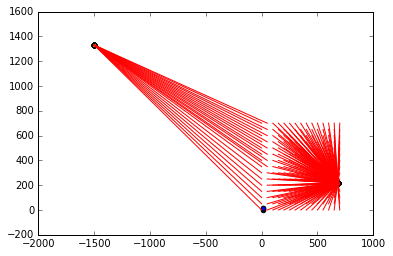

1.61118630721e-09 (-2.6594526616463554e-06, -8.2822546687566501e-07)
[ 679.69884221  217.05976036]
[679.6988448649287, 217.05976118851743]


In [238]:

results = []
initial_est = []

auvPos = [[0,0],[0,0],[0,0],[0,0]]
auvPosWN = [[0,0],[0,0],[0,0],[0,0]]
auvPos,auvPosWN = createPositions(auvPos)
shrimpPos = [rand.random()*shrimpRange, rand.random()*shrimpRange]
diff = getDiffFromShrimp(shrimpPos, auvPos)
timediff = getMags()
for i in range(15):
    for j in range(15):
        #initial_estimates = [rand.random()*shrimpRange, rand.random()*shrimpRange];
        initial_estimates = [i * 50, j * 50];
        initial_est.append(initial_estimates)
        result = (least_squares(loss, initial_estimates, bounds=[-1500,1500]))
        plt.plot([initial_estimates[0],result.x[0]], [initial_estimates[1], result.x[1]],c='r')
        plt.scatter(result.x[0], result.x[1], c='y')
        results.append(list(result.x))

    '''
init_guess = [0,0]
plt.scatter(result.x[0], result.x[1], c='y')
result = least_squares(loss, init_guess)
'''


angleguess = np.arctan(result.x[1]/result.x[0])
real = np.arctan(shrimpPos[1]/shrimpPos[0])
anglediff = (angleguess - real)*180/np.pi
posdiff = (result.x[0]-shrimpPos[0], result.x[1]-shrimpPos[1])

#plt.plot([0,res.x[0]], [0, res.x[1]], marker = 'o',c='b')
plt.scatter([shrimpPos[0]], [shrimpPos[1]], marker = 'o',c='r')
#plt.scatter([shrimpPos[0]], [shrimpPos[1]], marker = 'o',c='r')
x,y = zip(*auvPos)

plt.scatter(x,y)
#plt.scatter(shrimpPos[0], shrimpPos[1])
#plt.scatter(res.x[0], res.x[1], c='g')
print(result.status)
plt.show()
print(anglediff, posdiff)
#print(results)
print(result.x)
print(shrimpPos)


In [182]:
#According to the least squares algorithm, convergence always occurs, but result is inaccurate

auvPos = [[0,0],[0,0],[0,0],[0,0]]
print(anglediff, posdiff)
auvPosWN = [[0,0],[0,0],[0,0],[0,0]]

auvPos,auvPosWN = createPositions(auvPos)
shrimpPos = [rand.random()*shrimpRange, rand.random()*shrimpRange]
diff = getDiffFromShrimp(shrimpPos, auvPos)
timediff = getMags()

-5.2161096776e-13 (3.6448621898443889e-13, -9.3081098384573124e-13)


In [71]:

auvPos = [[0,0],[0,0],[0,0],[0,0]]
auvPosWN = [[0,0],[0,0],[0,0],[0,0]]
auvPos,auvPosWN = createPositions(auvPos)
shrimpPos = [rand.random()*shrimpRange, rand.random()*shrimpRange]
diff = getDiffFromShrimp(shrimpPos, auvPos)
timediff = getMags()

In [111]:
init_guess = [0,0]
plt.scatter(result.x[0], result.x[1], c='y')
result1 = least_squares(loss, init_guess)
result2 = least_squares(loss, [30,30])
print(result1)
print(result2)

 active_mask: array([ 0.,  0.])
        cost: 27.818988153272201
         fun: array([ 2.63397772,  0.55690467,  4.72521597, -2.07707305,  2.09123825,
        4.1683113 ])
        grad: array([ -6.41244794e-08,   2.94424507e-07])
         jac: array([[ -1.33091213e-04,  -2.28729960e-04],
       [ -8.24573162e-05,  -1.41708128e-04],
       [ -1.09649011e-05,  -1.88060242e-05],
       [  5.06338965e-05,   8.70218328e-05],
       [  1.22126312e-04,   2.09923936e-04],
       [  7.14924152e-05,   1.22902103e-04]])
     message: '`xtol` termination condition is satisfied.'
        nfev: 38
        njev: 28
  optimality: 2.9442450727782104e-07
      status: 3
     success: True
           x: array([-30993.781857  ,  18045.04048476])
 active_mask: array([ 0.,  0.])
        cost: 3.8159106611309907e-21
         fun: array([  5.06759079e-11,   2.82369683e-11,  -2.40873987e-12,
        -2.24389396e-11,  -5.30846478e-11,  -3.06457082e-11])
        grad: array([  1.51987755e-11,  -1.89987282e-11])


In [108]:
loss(init_guess)

array([-2.40666869, -1.77849132,  1.29296111,  0.62817737,  3.6996298 ,
        3.07145243])

[[-16.84998449303258, -2.1641010805765104],
 [-17.74660411446452, -12.626986224652505],
 [-16.6622023554446, -9.079002555530796],
 [-19.903856211477226, -1.2918659953141431]]

In [116]:
print(auvPos)

[[16.84998449303258, 2.1641010805765104], [17.74660411446452, 12.626986224652505], [16.6622023554446, 9.079002555530796], [19.903856211477226, 1.2918659953141431]]


In [225]:
results = []
initial_est = []
statusOneCount = 0;
statusBadCount = 0;
BadResults = 0;
GoodResults = 0;
for k in range(100):
    auvPos = [[0,0],[0,0],[0,0],[0,0]]
    auvPosWN = [[0,0],[0,0],[0,0],[0,0]]
    auvPos,auvPosWN = createPositions(auvPos)
    shrimpPos = [rand.random()*shrimpRange, rand.random()*shrimpRange]
    diff = getDiffFromShrimp(shrimpPos, auvPos)
    timediff = getMags()
    for i in range(15):
        for j in range(15):
            #initial_estimates = [rand.random()*shrimpRange, rand.random()*shrimpRange];
            initial_estimates = [i * 5, j * 5];
            initial_est.append(initial_estimates)
            result = (least_squares(loss, initial_estimates,  bounds=[-1500,1500]))
            results.append(list(result.x))

            if(result.status == 1):
                statusOneCount = statusOneCount + 1;
                angleguess = np.arctan(result.x[1]/result.x[0])
                real = np.arctan(shrimpPos[1]/shrimpPos[0])
                anglediff = (angleguess - real)*180/np.pi
                posdiff = [result.x[0]-shrimpPos[0], result.x[1]-shrimpPos[1]]    
                if(anglediff > 0.05 or posdiff[0] > 0.05 or posdiff[1] > 0.05):
                    BadResults = BadResults + 1;
                    '''
                    plt.scatter([initial_estimates[0]], [initial_estimates[1]], c='g')
                    plt.scatter([result.x[0]], [result.x[1]], c='y')
                    plt.scatter([shrimpPos[0]], [shrimpPos[1]], marker = 'o',c='r')
                    x,y = zip(*auvPos)
                    plt.scatter(x,y)
                    plt.show();
                    '''
                else:
                    GoodResults = GoodResults + 1;
                    break;
            else:
                statusBadCount = statusBadCount + 1;
            results.append(list(result.x))
            if(result.status == 1):
                break;
        if(result.status != 1):
            statusBadCount = statusBadCount + 1;
    
print("done");

done


In [226]:
print(BadResults)
print(GoodResults)
print(statusOneCount)
print(statusBadCount)

6
1492
1498
438
